# CSE 5243 - Introduction to Data Mining
## Homework 4: Clustering
- Semester: Autumn 2023
- Instructor: Tom Bihari
- Section: Tuesday/Thursday 2:20PM
- Student Name: Chaeun Hong
- Student Email: hong.930@osu.edu
- Student ID: 500457492

Template Version V8
***

***
# Section: Overview

### Objectives:

In this lab, you will perform clustering on three datasets.  Your will choose suitable clustering algorithms, evaluate them on the datasets, and compare their performance.

The objectives of this assignment are:
- Understand how to select and evaluate suitable off-the-shelf clustering algorithms based on the characteristics of a dataset and the outcomes you need.
- Understand how to tune and evaluate a clustering algorithm to achieve good performance.

### Datasets:

Three datasets are provided.  They are two-dimensional datasets.  They have different sizes (number of points) and shapes.  Each dataset contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm.  The files are:

- dataset1_Xydf.csv
- dataset2_Xydf.csv
- dataset3_Xydf.csv

### Approach:

This homework makes use of the Clustering Algorithms offered by the SciKitLearn Library.  Study the information at https://scikit-learn.org/stable/modules/clustering.html.  Follow the guidance in the individual sections below.

### Collaboration:

For this assignment, you must work as an individual. You may informally discuss ideas with classmates, to get advice on general Python usage, etc., but your work should be your own.  Please make use of Microsoft Teams for discussions with the intructor, TA, and classmates!

### What You Need to Turn In:

1. Code
- For this homework, the code is the Jupyter Notebook.  Use the provided Jupyter Notebook template, and fill in the appropriate information.
- This homework requires you to use clustering algorithms in the SciKitLearn library.  You also may use common Python libraries for I/O, data manipulation, data visualization, etc. (e.g., NumPy, Pandas, MatPlotLib,…).  You may not use library operations that perform, in effect, the entire “core” computations for this homework. (e.g., If you happen to find a single function on the web that does essentially *all* of a major portion of the homework, you may not use it.)  When in doubt, ask the grader or instructor.
- The code must be written by you, and any significant code snips you found on the Internet and used to understand how to do your coding for the core functionality must be attributed.  (You do not need to attribute basic functionality – matrix operations, IO, etc.)
- The code must be commented sufficiently to allow a reader to understand the algorithm without reading the actual Python, step by step.
- When in doubt, ask the grader or instructor.

2. Written Report
- For this homework, the report **is** the Jupyter Notebook.  The report should be well-written.  Please proof-read and remove spelling and grammar errors and typos.
- The report should discuss your analysis and observations. Key points and findings must be written in a style suitable for consumption by non-experts.  Present charts and graphs to support your observations. If you performed any data processing, cleaning, etc., please discuss it within the report.

### How to Turn In Your Work on Carmen:

**Please follow these instructions exactly** - it helps the grading process.  If you have questions, please ask.  Submit your Jupyter Notebook **.ipynb file** to Carmen - **do not ZIP or PDF it**. You do not need to include the input data.

### Grading:

0. Overall readability and organization of your report (5%) - Is it well organized and does the presentation flow in a logical manner; are there many grammar and spelling mistakes; do the charts/graphs relate to the text, etc.
1. Setup and Helper Functions (5%) - Are the Helper Functions (if any) and overall notebook setup correct, well structured, and suitable for use?
2. Evaluation of the K-Means Clustering Algorithm on Dataset1 (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
3. Evaluation of the K-Means Clustering Algorithm on Dataset2 (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
4. Evaluation of a Second Clustering Algorithm on Dataset2 (15%) – Is your choice of algorithm and your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
5. Comparison of the two Clustering Algorithms on Dataset2 (5%) - Is the comparison sound?  Did you choose a specific clustering algorithm as best and explain why?
6. Evaluation of the K-Means Clustering Algorithm on Dataset3 (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
7. Evaluation of a Second Clustering Algorithm on Dataset3 (15%) – Is your choice of algorithm and your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
8. Comparison of the two Clustering Algorithms on Dataset3 (5%) - Is the comparison sound?  Did you choose a specific clustering algorithm as best and explain why?
9. Conclusions (5%) – Did you document your overall insights?

### Instructions and Helpful Hints:
- Consider putting all of your "discussion" text in markdown cells, not inline with code. That gives you more control over formatting. Markdown cheat sheet: https://www.markdownguide.org/cheat-sheet
- Consider creating re-usable functions for some common operations - you will be doing the same sorts of things multiple times below.
- Explain what you are doing, and why.  Explain what you found out or learned.
- *Make sure you run your entire workbook before handing it in, so the output cells are populated.*
- Follow the Section structure as much as possible - put your content where it is requested, so we can find your answers.
- If you have questions on expectations or need clarification or guidance, please ask.  Post to Teams if it is a general question, so everyone benefits.

### References and Acknowledgements:

1. https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster
2. https://scikit-learn.org/stable/modules/clustering.html
3. https://docs.python.org/3/library/time.html
4. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html
5. https://gist.github.com/siolag161/dc6e42b64e1bde1f263b (using Hungarian Algorithm to match cluster labels - this is just an example)
6. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html (note that this is **mean** squared error)
***

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore')

#np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=120)

In [2]:
# HELPER FUNCTION - provided to you.  You may use this function or create your own visualizations.
def plot_clusters(title, X, y, size):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(size,size))
    plt.title(title)
    plt.xlabel("X0")
    plt.ylabel("X1")
    plt.scatter(X[:, 0], X[:, 1], s = 40, c = y[:])
    plt.show()
    plt.clf()

In [3]:
def plot_all_clusters(title, X, true_y, y, size):
    fig, axes = plt.subplots(1, 2, figsize=(size*2, size))

    fig.suptitle(title)

    axes[0].set_xlabel("X0")
    axes[0].set_ylabel("X1")
    axes[0].scatter(X[:, 0], X[:, 1], s = 40, c = true_y[:])

    axes[1].set_xlabel("X0")
    axes[1].set_ylabel("X1")
    axes[1].scatter(X[:, 0], X[:, 1], s = 40, c = y[:])

    plt.show()
    plt.clf()

In [4]:
# HELPER FUNCTION - provided to you.  You may use this function or create your own.
def remap_cluster_labels(true_y, pred_y):
    # Rearrange the predicted cluster labels so they best match the true ones.
    # This function takes the true and predicted labels and returns the remapped predicted labels.
    # Situation: A clustering algorithm returns a set of cluster labels.  These labels typically will not be the same as the
    # true cluster labels (because the algorithm does not know anything about the true labels).  For example, the algorithm
    # may return (2,1,2,0,1,0,...) while the true labels are (0,2,0,1,2,1,...). Therefore it is necessary remap 2->0, 1->2,
    # and 0->1 when evaluating the quality of the algorithm.
    # Note: This code has not been tested for cases where there are negative cluster numbers (e.g., -1 for DbScan)
    #       or for cases where the true_y and pred_y matrices are of different lengths.
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html
    from scipy.optimize import linear_sum_assignment

    conf_mat = confusion_matrix(true_y, pred_y)  #SciKitLearn convention is rows are true labels, cols are predicted labels

    # Find the optimal remapping of labels, so the predicted labels best match the true labels.
    # col_index is the predicted label; row_index is the true label to change it to.

    # Negate the costs so maximizing the assignment minimizes the mismatches
    row_index, col_index = linear_sum_assignment(conf_mat.max()-conf_mat)

    # Remap the predicted labels.
    new_pred_y = np.zeros(len(pred_y))
    for r in range(0,len(row_index)):
        old = col_index[r]  # the predicted y's
        new = row_index[r]  # remap to the corresponding true y's
        new_pred_y[pred_y == old] = new

    return new_pred_y  # return the remapped labels

In [28]:
# SUGGESTION - consider creating functions like these.
def compute_single_sse(labels, target_label, X, centroids):
    sse = 0

    for i in range(len(X)):
      if(labels[i] == target_label):
        cluster_center = centroids[labels[i]]
        squared_distance = ((X[i][0] - cluster_center[0]) ** 2 + (X[i][1] - cluster_center[1]) ** 2)
        sse += squared_distance

    return sse

def compute_all_sse(labels, X, centroids):
    # calculate sum of WSS
    sum_wss = 0
    all_labels = np.unique(labels)
    for label in all_labels:
      sum_wss += compute_single_sse(labels, label, X, centroids)

    # calculate BSS
    global_centroid = np.mean(X, axis=0)
    cluster_sizes = [np.sum(labels == label) for label in all_labels]
    bss = np.sum(cluster_sizes * np.sum((centroids - global_centroid) ** 2, axis=1))

    # calculate overall SSE (BSS + WSS)
    overall_sse = bss + sum_wss

    # return sum of WSS, BSS, and overall SSE
    return sum_wss, overall_sse - sum_wss, overall_sse

In [20]:
# SUGGESTION - consider creating a function to print the evaluation results of the clustering.
def print_evaluation_results(title_string, show_true_cluster_info, show_pred_cluster_info, X, true_y, pred_y, running_time, centroids):
    # Print plots, WSS, BSS, total SSE, accuracy, confusion matrix, classification report, running time, etc.
    print(title_string)

    if(show_true_cluster_info):
        print("TRUE:")
        # print plot
        plot_clusters("True", X, true_y, 5)
        # print WSS, BSS, total SSE
        WSS, BSS, total_SSE = compute_all_sse(true_y, X, centroids)
        print("WSS: " + str(WSS))
        print("BSS: " + str(BSS))
        print("Total SSE: " + str(total_SSE))

    if(show_pred_cluster_info):
        print("PREDICTED:")
        # print plot
        plot_clusters("Predicted", X, pred_y, 5)
        # print WSS, BSS, total SSE
        WSS, BSS, total_SSE = compute_all_sse(pred_y, X, centroids)
        print("WSS: " + str(WSS))
        print("BSS: " + str(BSS))
        print("Total SSE: " + str(total_SSE))
        print()
        # re-mapping cluster label
        new_pred_y = remap_cluster_labels(true_y, pred_y)
        # print accuracy, confusion matrix, and classification report
        accuracy = accuracy_score(true_y, new_pred_y)
        print("Accuracy: "+ str(accuracy))
        print()
        print("Confusion matrix")
        print(confusion_matrix(true_y, new_pred_y))
        print()
        print("Classification report")
        print(classification_report(true_y, new_pred_y))
        # print running time
        print("Running time: " + str(running_time))

    return WSS, BSS, total_SSE

In [7]:
def print_comparsion_plot(WSS_list, BSS_list, total_SSE_list, x_axis):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].set_title("WSS")
    axes[0].plot(x_axis, WSS_list[1:])
    axes[0].axhline(y=WSS_list[0], color = 'r')

    axes[1].set_title("BSS")
    axes[1].plot(x_axis, BSS_list[1:])
    axes[1].axhline(y=BSS_list[0], color = 'r')

    axes[2].set_title("Total SSE")
    axes[2].plot(x_axis, total_SSE_list[1:])
    axes[2].axhline(y=total_SSE_list[0], color = 'r')

    plt.show()

In [29]:
# calculate centroid for true_y (true clustering), results from other clustering algorithms (such as DBSCAN and Spectral Clustering)
def calculate_centroids(y, X):
    all_labels = np.unique(y)
    centroids = []

    for label in all_labels:
        centroid = np.mean(X[y == label], axis=0)
        centroids.append(centroid)

    return centroids

***
# Section: 1 - Evaluate the **K-Means** Algorithm on **Dataset1**
***

***
## Section: 1.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
- Print all of the evaluation results.
***

In [30]:
WSS_list = []
BSS_list = []
total_SSE_list = []

In [31]:
dataset1_df = pd.read_csv('dataset1_Xydf.csv')
X = dataset1_df[['X0','X1']].to_numpy()
true_y = dataset1_df['y'].to_numpy()

In [32]:
centroids = calculate_centroids(true_y, X)

DATASET1 TRUE CLUSTER MEASURES:
TRUE:


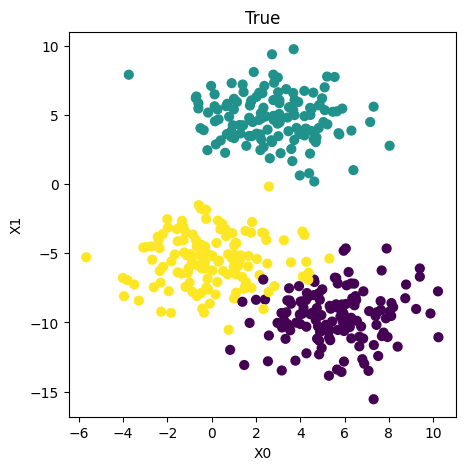

WSS: 2853.4475223724235
BSS: 16804.137239802465
Total SSE: 19657.584762174887


<Figure size 640x480 with 0 Axes>

In [33]:
WSS, BSS, total_SSE = print_evaluation_results("DATASET1 TRUE CLUSTER MEASURES:", True, False, X, true_y, None, 0.0, centroids)

WSS_list.append(WSS)
BSS_list.append(BSS)
total_SSE_list.append(total_SSE)

***
## Section: 1.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
  - Create a scatterplot of your clustering.
    - To assist in comparison, consider creating two adjacent scatterplots (true vs predicted), or overlaying the true and predicted clusterings on one scatterplot.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the helper function above and the linear-sum-assignment and Hungarian algorithm references.
***

DATASET1 PREDICTED CLUSTER MEASURES:
PREDICTED:


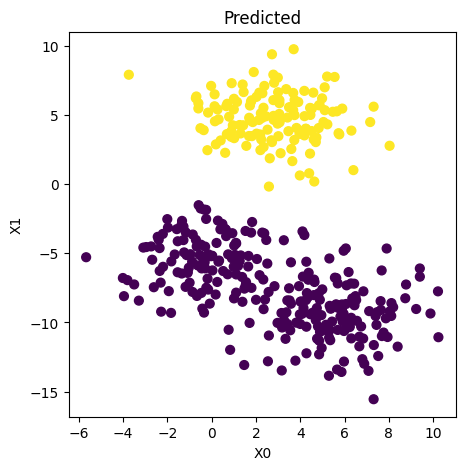

WSS: 6048.574523628557
BSS: 13609.01023854633
Total SSE: 19657.584762174887

Accuracy: 0.6675

Confusion matrix
[[134   0   0]
 [  0 133   0]
 [132   1   0]]

Classification report
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       134
           1       0.99      1.00      1.00       133
           2       0.00      0.00      0.00       133

    accuracy                           0.67       400
   macro avg       0.50      0.67      0.56       400
weighted avg       0.50      0.67      0.56       400

Running time: 0.05984973907470703


<Figure size 640x480 with 0 Axes>

In [34]:
start_time = time.time()
kmeans = KMeans(n_clusters=2).fit(X)
end_time = time.time()
WSS, BSS, total_SSE = print_evaluation_results("DATASET1 PREDICTED CLUSTER MEASURES:", False, True, X, true_y, kmeans.labels_,
                         end_time - start_time, kmeans.cluster_centers_)

pred_y_2 = kmeans.labels_

WSS_list.append(WSS)
BSS_list.append(BSS)
total_SSE_list.append(total_SSE)

DATASET1 PREDICTED CLUSTER MEASURES:
PREDICTED:


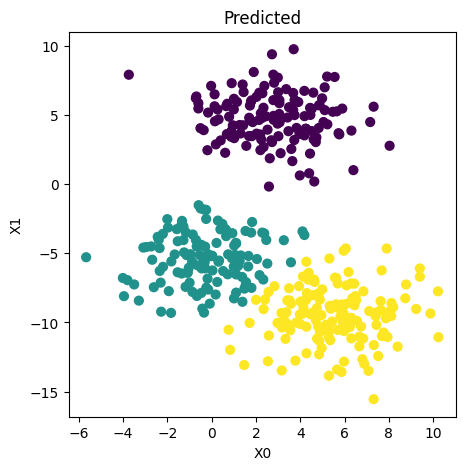

WSS: 2766.4723819540623
BSS: 16891.11238022083
Total SSE: 19657.584762174894

Accuracy: 0.97

Confusion matrix
[[132   0   2]
 [  0 133   0]
 [  9   1 123]]

Classification report
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       134
           1       0.99      1.00      1.00       133
           2       0.98      0.92      0.95       133

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

Running time: 0.07989978790283203


<Figure size 640x480 with 0 Axes>

In [35]:
start_time = time.time()
kmeans = KMeans(n_clusters=3).fit(X)
end_time = time.time()
WSS, BSS, total_SSE = print_evaluation_results("DATASET1 PREDICTED CLUSTER MEASURES:", False, True, X, true_y, kmeans.labels_,
                         end_time - start_time, kmeans.cluster_centers_)

pred_y_3 = kmeans.labels_

WSS_list.append(WSS)
BSS_list.append(BSS)
total_SSE_list.append(total_SSE)

DATASET1 PREDICTED CLUSTER MEASURES:
PREDICTED:


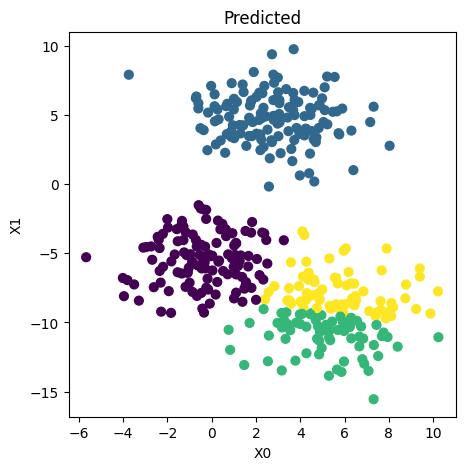

WSS: 2395.673438560876
BSS: 17261.911323614015
Total SSE: 19657.58476217489

Accuracy: 0.81

Confusion matrix
[[ 71   0   3  60]
 [  0 133   0   0]
 [  2   1 120  10]
 [  0   0   0   0]]

Classification report
              precision    recall  f1-score   support

         0.0       0.97      0.53      0.69       134
         1.0       0.99      1.00      1.00       133
         2.0       0.98      0.90      0.94       133
         3.0       0.00      0.00      0.00         0

    accuracy                           0.81       400
   macro avg       0.74      0.61      0.65       400
weighted avg       0.98      0.81      0.87       400

Running time: 1.0810301303863525


<Figure size 640x480 with 0 Axes>

In [36]:
start_time = time.time()
kmeans = KMeans(n_clusters=4).fit(X)
end_time = time.time()
WSS, BSS, total_SSE = print_evaluation_results("DATASET1 PREDICTED CLUSTER MEASURES:", False, True, X, true_y, kmeans.labels_,
                         end_time - start_time, kmeans.cluster_centers_)

pred_y_4 = kmeans.labels_

WSS_list.append(WSS)
BSS_list.append(BSS)
total_SSE_list.append(total_SSE)

***
## Section: 1.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

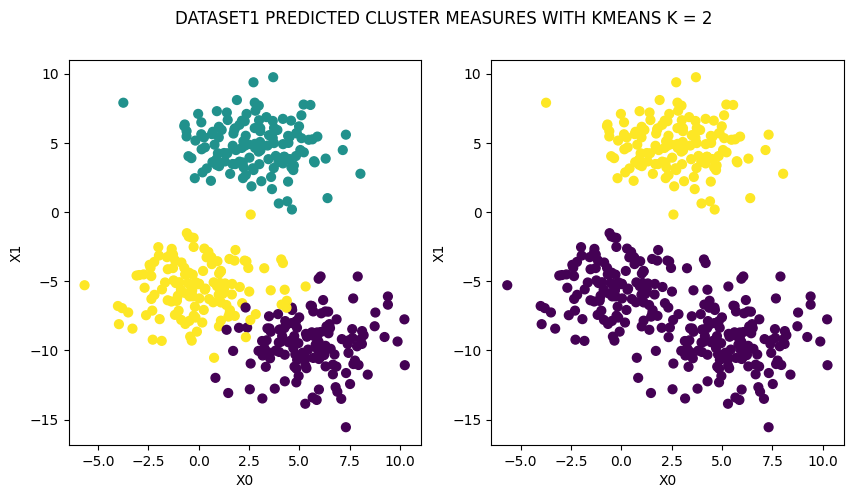

<Figure size 640x480 with 0 Axes>

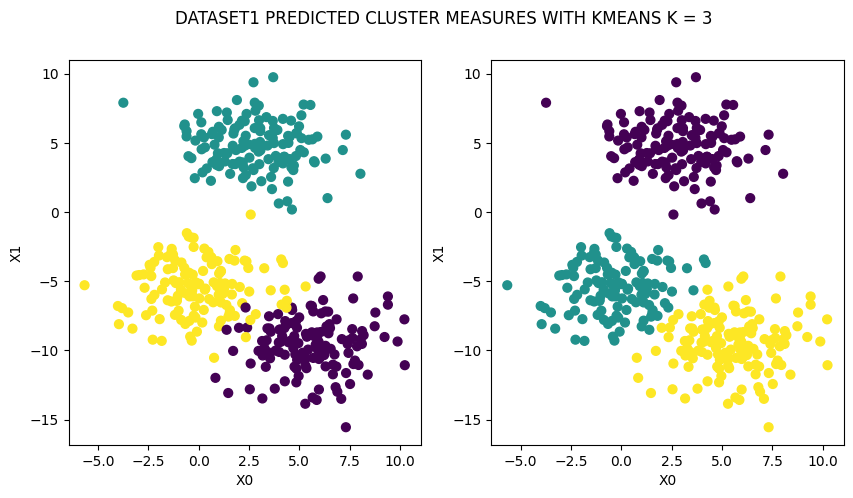

<Figure size 640x480 with 0 Axes>

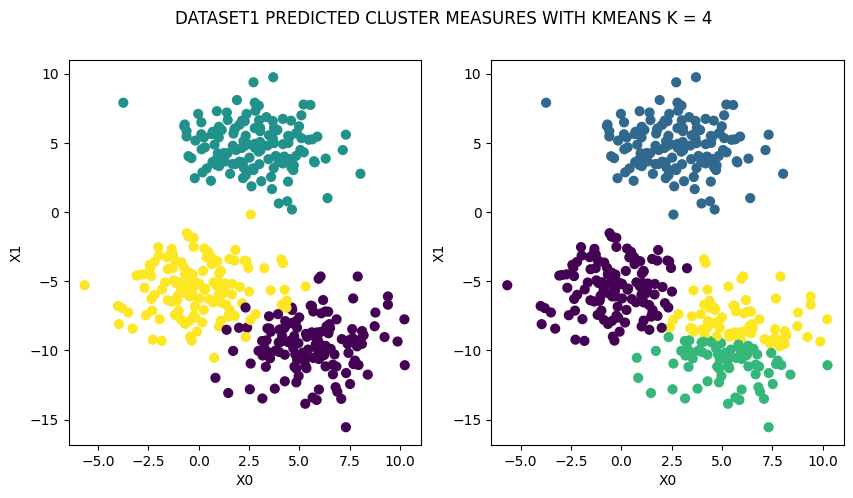

<Figure size 640x480 with 0 Axes>

In [37]:
plot_all_clusters("DATASET1 PREDICTED CLUSTER MEASURES WITH KMEANS K = 2", X, true_y, pred_y_2, 5)
plot_all_clusters("DATASET1 PREDICTED CLUSTER MEASURES WITH KMEANS K = 3", X, true_y, pred_y_3, 5)
plot_all_clusters("DATASET1 PREDICTED CLUSTER MEASURES WITH KMEANS K = 4", X, true_y, pred_y_4, 5)

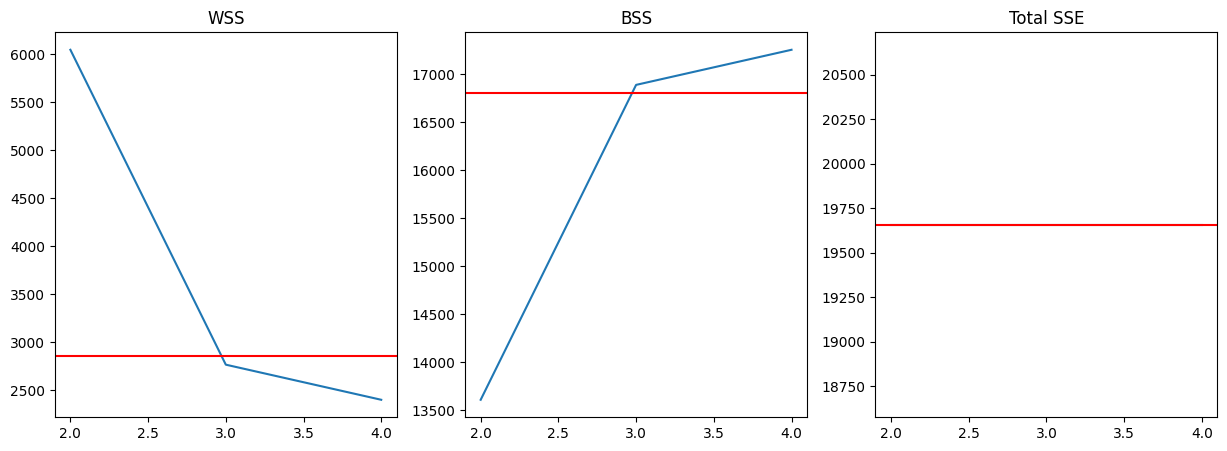

In [ ]:
x_axis = [2,3,4]
print_comparsion_plot(WSS_list, BSS_list, total_SSE_list, x_axis)

**Discussion**

Based on the ground truth clustering, there are three clusters and two below clusters are overlapped. Also, the point about (2.5, 0) is clustered as a yellow one, but it seems closer to the green one in the true clustering.

Using the same dataset, I evaluated the K-Means algorithm with a different number of K. BSS calculates the sum of the distance between the global centroid and centroid from each cluster, and WSS calculates the sum of the distance between points and the cluster centroid of each point. By increasing K, WSS is decreased and BSS is increased. This is because, by increasing the number of K, there are more clusters, and the distance between the center of clusters and each point belonging to the cluster becomes smaller. Therefore, these clusters can be considered as successful. Total SSE is the sum of WSS and BSS, and it is the same no matter what K values.

The highest accuracy is 0.97 when K = 3 (same number of clusters as true clustering). Based on the classification report and accuracy, the best K is 3 because its overall precision and recall are better than others. When K is 3, WSS and BSS values are closest to the true clustering. These results can be visualized like the above plots - K=3 shows the most similar plot to the true clustering. From the above three plots, the red linear line means true clustering WSS, BSS, and total SSE each. As I mentioned, K = 3 shows the closest to the true clustering. This result is shown from the above scatter plot as visualized.

Running time with different K values does not make a meaningful difference. This is because the difference between K values used for evaluation is small.

***
# Section: 2 - Evaluate the **K-Means** Algorithm on **Dataset2**
***

***
## Section: 2.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

In [22]:
WSS_list = []
BSS_list = []
total_SSE_list = []

In [41]:
dataset1_df = pd.read_csv('dataset2_Xydf.csv')
X = dataset1_df[['X0','X1']].to_numpy()
true_y = dataset1_df['y'].to_numpy()

In [42]:
centroids = calculate_centroids(true_y, X)

DATASET2 TRUE CLUSTER MEASURES:
TRUE:


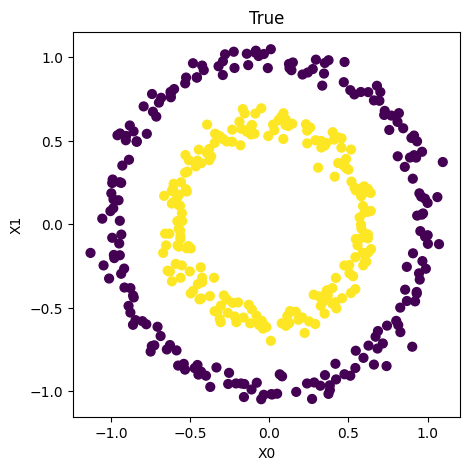

WSS: 273.58076894897897
BSS: 0.00637886180447822
Total SSE: 273.58714781078345


<Figure size 640x480 with 0 Axes>

In [43]:
WSS, BSS, total_SSE = print_evaluation_results("DATASET2 TRUE CLUSTER MEASURES:", True, False, X, true_y, None, 0.0, centroids)

WSS_list.append(WSS)
BSS_list.append(BSS)
total_SSE_list.append(total_SSE)

***
## Section: 2.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
  - Create a scatterplot of your clustering.
    - To assist in comparison, consider creating two adjacent scatterplots (true vs predicted), or overlaying the true and predicted clusterings on one scatterplot.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the helper function above and the linear-sum-assignment and Hungarian algorithm references.
***

DATASET2 PREDICTED CLUSTER MEASURES:
PREDICTED:


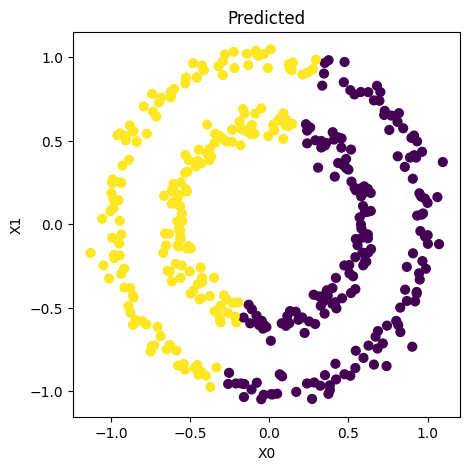

WSS: 167.9473519555429
BSS: 105.63979585524066
Total SSE: 273.58714781078356

Accuracy: 0.5025

Confusion matrix
[[100 100]
 [ 99 101]]

Classification report
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       200
           1       0.50      0.51      0.50       200

    accuracy                           0.50       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.50      0.50      0.50       400

Running time: 0.021854400634765625


<Figure size 640x480 with 0 Axes>

In [44]:
start_time = time.time()
kmeans = KMeans(n_clusters=2).fit(X)
end_time = time.time()
WSS, BSS, total_SSE = print_evaluation_results("DATASET2 PREDICTED CLUSTER MEASURES:", False, True, X, true_y, kmeans.labels_,
                         end_time - start_time, kmeans.cluster_centers_)

pred_y_2 = kmeans.labels_

WSS_list.append(WSS)
BSS_list.append(BSS)
total_SSE_list.append(total_SSE)

DATASET2 PREDICTED CLUSTER MEASURES:
PREDICTED:


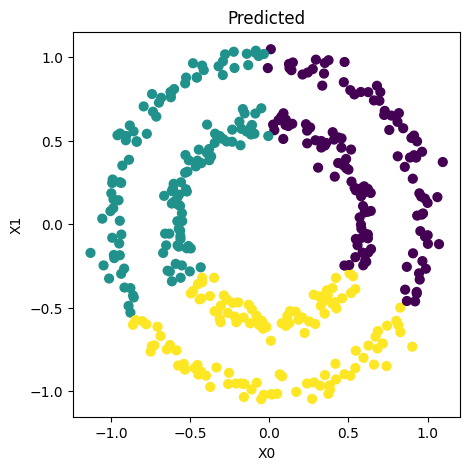

WSS: 97.22699809250386
BSS: 176.3601497182797
Total SSE: 273.58714781078356

Accuracy: 0.34

Confusion matrix
[[66 68 66]
 [67 70 63]
 [ 0  0  0]]

Classification report
              precision    recall  f1-score   support

         0.0       0.50      0.33      0.40       200
         1.0       0.51      0.35      0.41       200
         2.0       0.00      0.00      0.00         0

    accuracy                           0.34       400
   macro avg       0.33      0.23      0.27       400
weighted avg       0.50      0.34      0.41       400

Running time: 0.3466317653656006


<Figure size 640x480 with 0 Axes>

In [45]:
start_time = time.time()
kmeans = KMeans(n_clusters=3).fit(X)
end_time = time.time()
WSS, BSS, total_SSE = print_evaluation_results("DATASET2 PREDICTED CLUSTER MEASURES:", False, True, X, true_y, kmeans.labels_,
                         end_time - start_time, kmeans.cluster_centers_)

pred_y_3 = kmeans.labels_

WSS_list.append(WSS)
BSS_list.append(BSS)
total_SSE_list.append(total_SSE)

DATASET2 PREDICTED CLUSTER MEASURES:
PREDICTED:


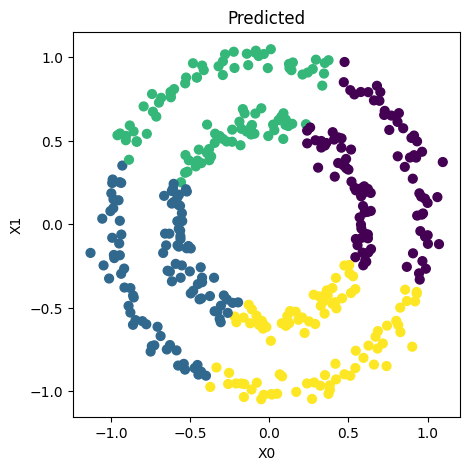

WSS: 64.25038179072405
BSS: 209.3367660200595
Total SSE: 273.58714781078356

Accuracy: 0.27

Confusion matrix
[[53 49 47 51]
 [45 55 54 46]
 [ 0  0  0  0]
 [ 0  0  0  0]]

Classification report
              precision    recall  f1-score   support

         0.0       0.54      0.27      0.36       200
         1.0       0.53      0.28      0.36       200
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0

    accuracy                           0.27       400
   macro avg       0.27      0.14      0.18       400
weighted avg       0.53      0.27      0.36       400

Running time: 0.03272056579589844


<Figure size 640x480 with 0 Axes>

In [46]:
start_time = time.time()
kmeans = KMeans(n_clusters=4).fit(X)
end_time = time.time()
WSS, BSS, total_SSE = print_evaluation_results("DATASET2 PREDICTED CLUSTER MEASURES:", False, True, X, true_y, kmeans.labels_,
                         end_time - start_time, kmeans.cluster_centers_)

pred_y_4 = kmeans.labels_

WSS_list.append(WSS)
BSS_list.append(BSS)
total_SSE_list.append(total_SSE)

***
## Section: 2.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

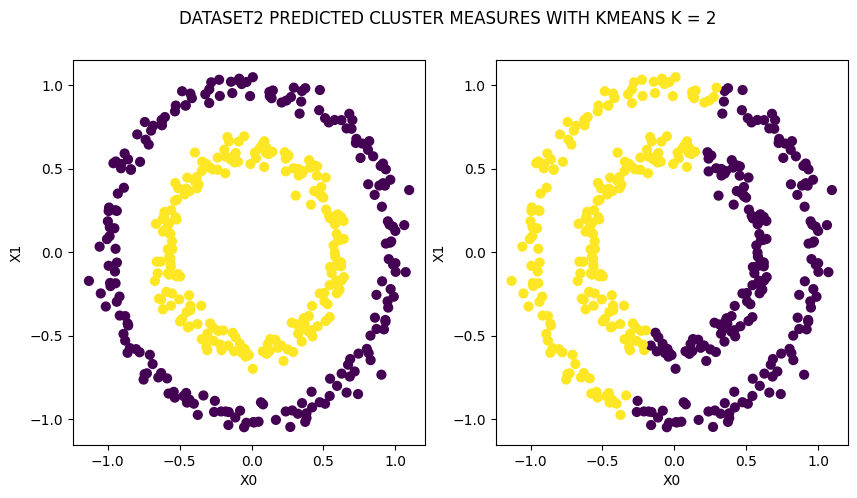

<Figure size 640x480 with 0 Axes>

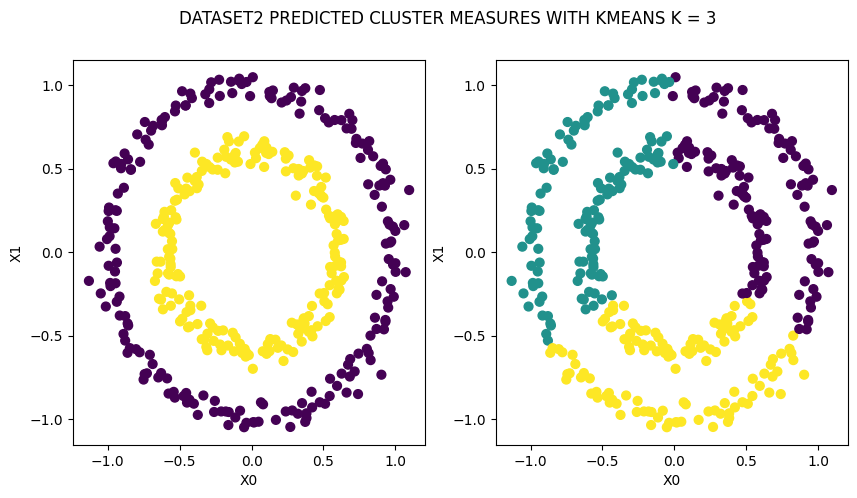

<Figure size 640x480 with 0 Axes>

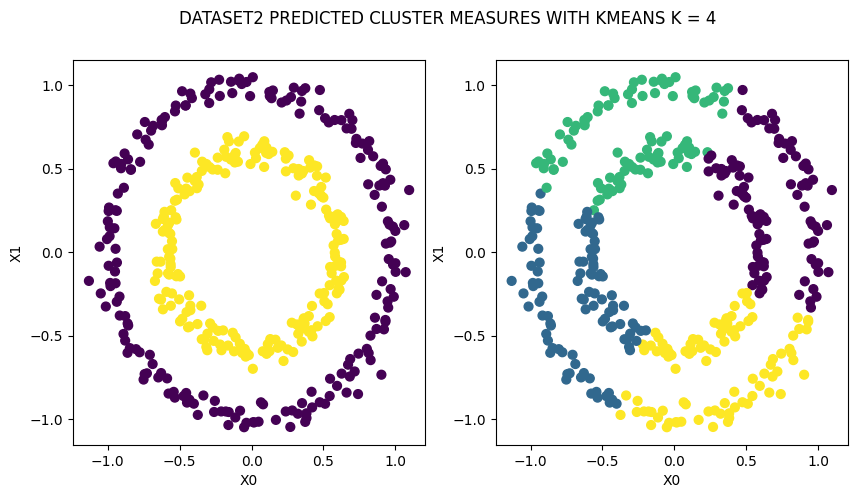

<Figure size 640x480 with 0 Axes>

In [47]:
plot_all_clusters("DATASET2 PREDICTED CLUSTER MEASURES WITH KMEANS K = 2", X, true_y, pred_y_2, 5)
plot_all_clusters("DATASET2 PREDICTED CLUSTER MEASURES WITH KMEANS K = 3", X, true_y, pred_y_3, 5)
plot_all_clusters("DATASET2 PREDICTED CLUSTER MEASURES WITH KMEANS K = 4", X, true_y, pred_y_4, 5)

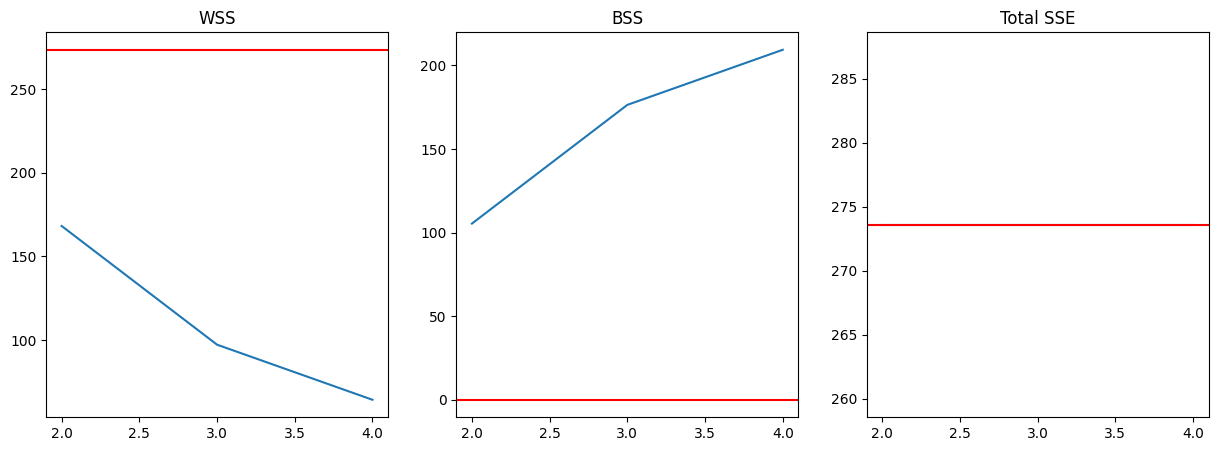

In [ ]:
x_axis = [2,3,4]
print_comparsion_plot(WSS_list, BSS_list, total_SSE_list, x_axis)

**Discussion**

Based on the true clustering, there are two clusters and each one is circular (or ring). This shape of clusters is hard to do using K means because K means cannot handle non-globular shaped clusters. This is because The K means algorithm clusters based on the distance with centroid (mean of the points in the cluster). The K means algorithm tries to minimize WSS by dividing points into bipartite based on the spatial.

This trend can be checked from the above results, all K means results show that clustering divides into partites based on the space. Also, the number of points in each cluster is similar and space is divided evenly. By increasing the number of K values, WSS is decreasing and BSS is increasing. This trend shows how K means work as I mentioned before.

Overall results are bad, but the best one is when K is 2. Accuracy is 0.5, and precision and recall are better than other K values. By increasing the number of K, accuracy, precision, and recall become lower.

Taken times are all similar because the difference between K values is small.

***
# Section: 3 - Evaluate a **Second** Clustering Algorithm on **Dataset2**
***

***
## Section: 3.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
- See the SciKitLearn references.
***

**Discussion**

I chose DBSCAN. The problem of K means is that it cannot handle non-convex clusters (or non-globular). However, DBSCAN can be dealing with arbitrary shapes of clustering. DBSCAN uses eps (the maximum distance between two samples for one to be considered in the neighborhood of the other) and min_samples (the number of samples in a neighborhood for a point to be considered as a core point). Instead of a partitioning clustering approach (K means), DBSCAN is a density-based algorithm. Therefore, I expected that dataset2 would be clustered better using DBSCAN.

***
## Section: 3.2 - Configure and Run the Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for (at least) two variations of the configuration settings (if any).
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
  - Create a scatterplot of your clustering.
    - To assist in comparison, consider creating two adjacent scatterplots (true vs predicted), or overlaying the true and predicted clusterings on one scatterplot.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the helper function above and the linear-sum-assignment and Hungarian algorithm references.
***

**Discussion**

I fixed min_samples to 5 and evaluated DBSCAN with different eps (0.075, 0.15, and 0.3). The parameter named min_samples means the number of samples in a neighborhood for a point to be considered as a core point. Higher min_samples make DBSCAN find more dense clusters, but in dataset2, two circular clusters are dense enough. In other words, changing the number of min_samples does not show an interesting difference. This is why I fixed min_samples. The parameter named eps means the maximum distance between two samples for one to be considered as in the neighborhood of the other. Therefore, by increasing its value, the boundary of each cluster becomes larger. This change shows different results, so I used this parameter to evaluate DBSCAN.

In [ ]:
WSS_list = WSS_list[:1]
BSS_list =BSS_list[:1]
total_SSE_list = total_SSE_list[:1]

DATASET2 PREDICTED CLUSTER MEASURES:
PREDICTED:


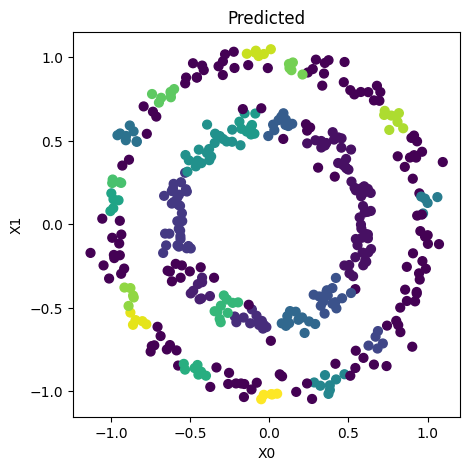

WSS: 552.1502358684792
BSS: 143.22154923791936
Total SSE: 695.3717851063985

Accuracy: 0.43

Confusion matrix
[[118   0   0   0   5   0   0   0   8   5   8   0   0   5   7   0   4   7   5   5   7   6   5   5]
 [ 32  54   8  30   0  16  10  11   0   0   0  20   9   0   0  10   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]

<Figure size 640x480 with 0 Axes>

In [26]:
start_time = time.time()
dbscan = DBSCAN(eps = 0.075, min_samples=5).fit(X)
end_time = time.time()

pred_y_125 = dbscan.labels_

centroids = calculate_centroids(pred_y_125, X)

WSS, BSS, total_SSE = print_evaluation_results("DATASET2 PREDICTED CLUSTER MEASURES:", False, True, X, true_y, pred_y_125,
                         end_time - start_time, centroids)

WSS_list.append(WSS)
BSS_list.append(BSS)
total_SSE_list.append(total_SSE)

DATASET2 PREDICTED CLUSTER MEASURES:
PREDICTED:


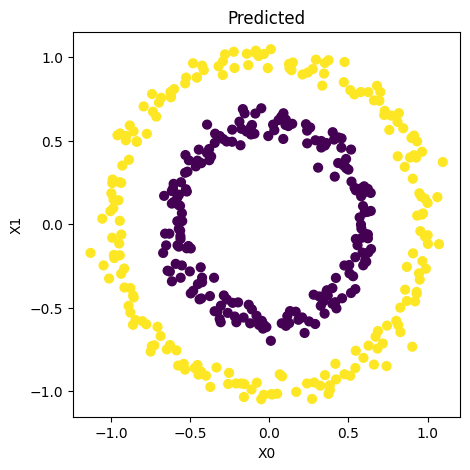

WSS: 273.58076894897897
BSS: 0.00637886180447822
Total SSE: 273.58714781078345

Accuracy: 1.0

Confusion matrix
[[200   0]
 [  0 200]]

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Running time: 0.008825063705444336


<Figure size 640x480 with 0 Axes>

In [27]:
start_time = time.time()
dbscan = DBSCAN(eps = 0.15, min_samples=5).fit(X)
end_time = time.time()

pred_y_15 = dbscan.labels_

centroids = calculate_centroids(pred_y_15, X)

WSS, BSS, total_SSE = print_evaluation_results("DATASET2 PREDICTED CLUSTER MEASURES:", False, True, X, true_y, pred_y_15,
                         end_time - start_time, centroids)

WSS_list.append(WSS)
BSS_list.append(BSS)
total_SSE_list.append(total_SSE)

DATASET2 PREDICTED CLUSTER MEASURES:
PREDICTED:


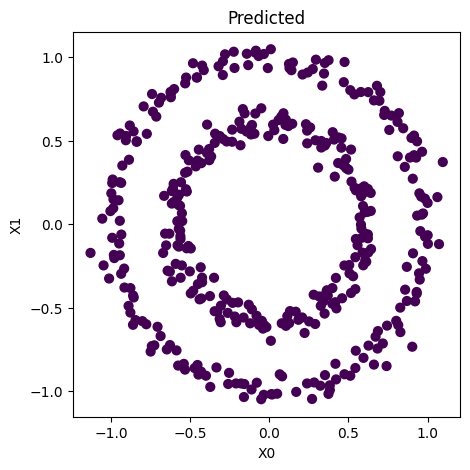

WSS: 273.5871478107835
BSS: 0.0
Total SSE: 273.5871478107835

Accuracy: 0.5

Confusion matrix
[[200   0]
 [200   0]]

Classification report
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       200
           1       0.00      0.00      0.00       200

    accuracy                           0.50       400
   macro avg       0.25      0.50      0.33       400
weighted avg       0.25      0.50      0.33       400

Running time: 0.0044536590576171875


<Figure size 640x480 with 0 Axes>

In [ ]:
start_time = time.time()
dbscan = DBSCAN(eps = 0.3, min_samples=5).fit(X)
end_time = time.time()

pred_y_5 = dbscan.labels_

centroids = calculate_centroids(pred_y_5, X)

WSS, BSS, total_SSE = print_evaluation_results("DATASET2 PREDICTED CLUSTER MEASURES:", False, True, X, true_y, pred_y_5,
                         end_time - start_time, centroids)

WSS_list.append(WSS)
BSS_list.append(BSS)
total_SSE_list.append(total_SSE)

***
## Section: 3.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

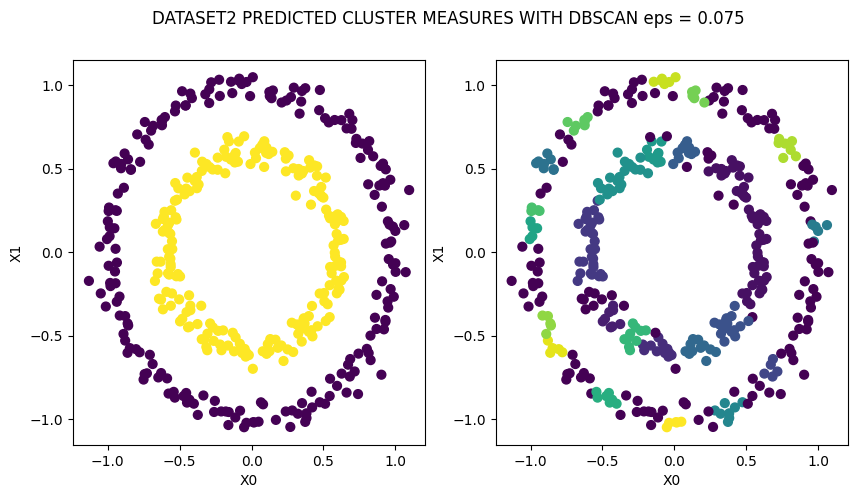

<Figure size 640x480 with 0 Axes>

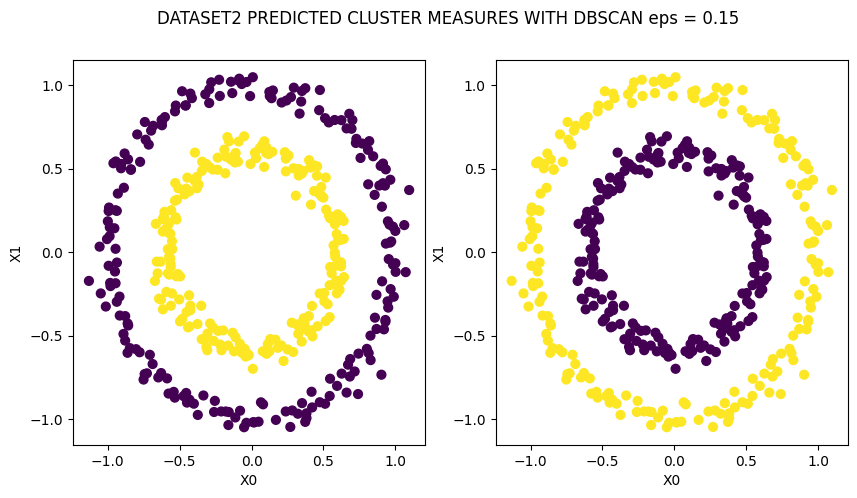

<Figure size 640x480 with 0 Axes>

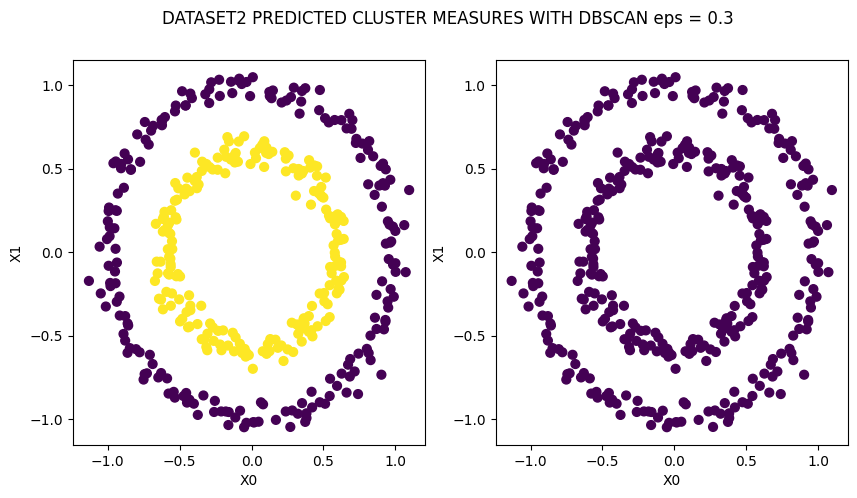

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_all_clusters("DATASET2 PREDICTED CLUSTER MEASURES WITH DBSCAN eps = 0.075", X, true_y, pred_y_125, 5)
plot_all_clusters("DATASET2 PREDICTED CLUSTER MEASURES WITH DBSCAN eps = 0.15", X, true_y, pred_y_15, 5)
plot_all_clusters("DATASET2 PREDICTED CLUSTER MEASURES WITH DBSCAN eps = 0.3", X, true_y, pred_y_5, 5)

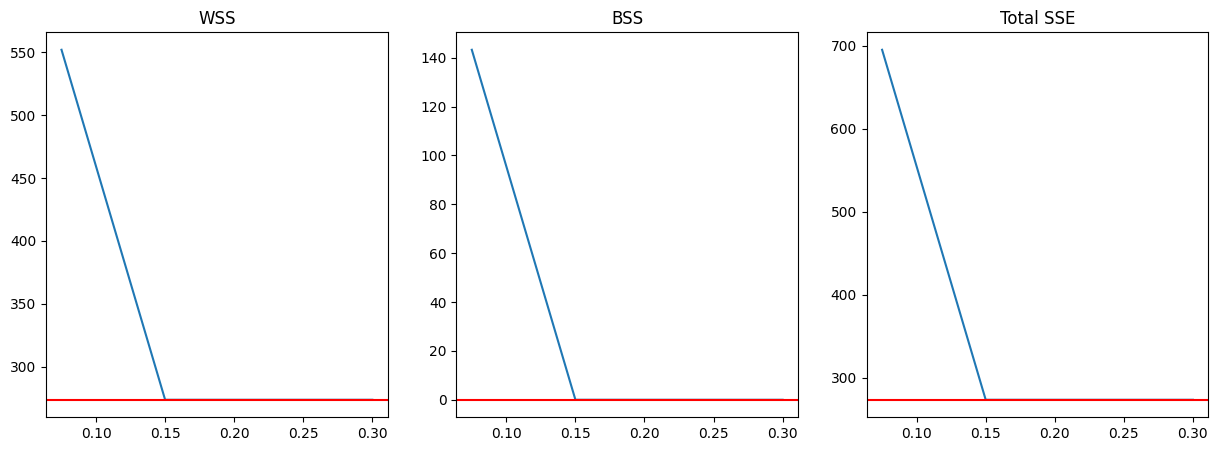

In [ ]:
x_axis = [0.075,0.15,0.3]
print_comparsion_plot(WSS_list, BSS_list, total_SSE_list, x_axis)

**Discussion**

Compared to the true clustering WSS and BSS are the same when eps = 0.15 and almost the same when eps = 0.3.

When eps = 0.075, because of small eps, there are more than 2 clusters. Its WSS and BSS are much higher than true clustering. Accuracy is 0.43 which is poor performance. From the classification report, precision and recall are bad, too. This is because of a small number of eps, then it is hard to consider points are in the same cluster if they are far apart more than 0.075. This may lead to overfitting later.

When eps = 0.3, because of large eps, there is only one cluster. All data points are in the same cluster. WSS is almost the same as the true clustering because each cluster centroid in the true clustering is almost the same (looks like two concentric circles). BSS is 0 because there is only one cluster, cluster's centroid and global centroid are the same. However, accuracy is only 0.5, and lower precision and recall based on the classification report.

When eps = 0.15, the result shows the same as true clustering. WSS and BSS are the same, accuracy is 1. Both precision and recall are also 1. In other words, this eps value is appropriate to do clustering dataset2.

Running times are no meaningful difference between different eps values, so this will not be considered for deciding the best eps value.

***
# Section: 4 - Comparison of the Two Clustering Algorithms on **Dataset2**
***

***
## Section: 4.1 - Compare Their Performance
- What was their relative performance (quality and timing), and their performance versus the true clustering?
- What characteristics of the data might impact the clustering algorithms' performance?
***

**Discussion**

Result of two clustering algorithms on dataset2

|  | WSS | BSS | Total SSE | Accuaracy |
|--|-----|-----|-----------|-----------|
| True | 273.58076894897897 | 0.00637886180447822 | 273.58714781078345 | - |
| K means | 168.19638438170196 | 105.3907634290816 | 273.58714781078356 | 0.505 |
| DBSCAN | 273.58076894897897 | 0.00637886180447822 | 273.58714781078345 | 1.0 |

**Discussion**

Compared to two clustering algorithms - K means and DBSCAN, DBSCAN shows better performance in terms of quality. The best result in K means is when K = 2 and the best result in DBSCAN is when eps = 0.15. As you can see from the above table, WSS and BSS in DBSCAN show the same as true clustering. Additionally, accuracy, precision, and recall are 1.0 and this can be checked from the previous section's plot (Section 3.3). There is no meaningful difference in the running time. Therefore, DBSCAN is better to be used for this dataset.

The reason why DBSCAN shows better performance in dataset2 is that DBSCAN only works for non-convex clusters (does not work well for non-globular shapes). As you can see from the results in Section 2.3, each cluster in the k means shows similar size and the mean of the cluster is the cluster centroid. Using that centroids, the K means algorithm calculates the distance between points and the cluster centroids, so it works well with globular clusters.

However, DBSCAN is based on the density and it can work well for non-globular shapes. DBSCAN does not calculate the centroid for each cluster. The main idea for DBSCAN is core points. Each core point has the min_samples and eps. Using core points, DBSCAN does clustering with neighbor points if they are close enough. Therefore, DBSCAN can do clustering with more complex shapes.

***
## Section: 4.2 - Choose the Better Clustering Algorithm
- Choose one of the two clustering algorithm as better and explain why.
***

**Discussion**

Based on the comparison in the previous Section 4.1, I would take DBSCAN to cluster dataset2 (eps = 0.15). It shows a much better performance compared to the result from K means. Both K means and DBSCAN algorithms are enough fast to run (there is no meaningful difference between the two clustering algorithms).

***
# Section: 5 - Evaluate the **K-Means** Algorithm on **Dataset3**
***

***
## Section: 5.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

In [48]:
WSS_list = []
BSS_list = []
total_SSE_list = []

In [49]:
dataset1_df = pd.read_csv('dataset3_Xydf.csv')
X = dataset1_df[['X0','X1']].to_numpy()
true_y = dataset1_df['y'].to_numpy()

In [50]:
centroids = calculate_centroids(true_y, X)

DATASET3 TRUE CLUSTER MEASURES:
TRUE:


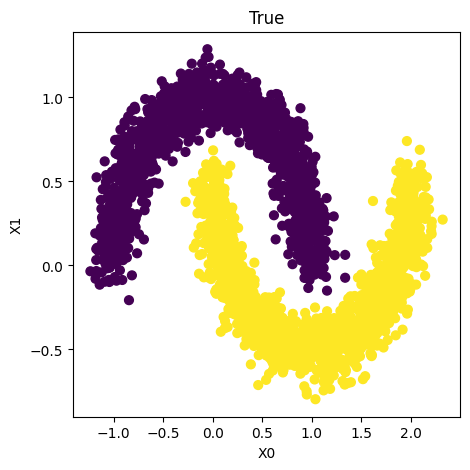

WSS: 1843.8528440575797
BSS: 1212.169575810768
Total SSE: 3056.0224198683477


<Figure size 640x480 with 0 Axes>

In [51]:
WSS, BSS, total_SSE = print_evaluation_results("DATASET3 TRUE CLUSTER MEASURES:", True, False, X, true_y, None, 0.0, centroids)

WSS_list.append(WSS)
BSS_list.append(BSS)
total_SSE_list.append(total_SSE)

***
## Section: 5.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
  - Create a scatterplot of your clustering.
    - To assist in comparison, consider creating two adjacent scatterplots (true vs predicted), or overlaying the true and predicted clusterings on one scatterplot.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the helper function above and the linear-sum-assignment and Hungarian algorithm references.
***

DATASET3 PREDICTED CLUSTER MEASURES:
PREDICTED:


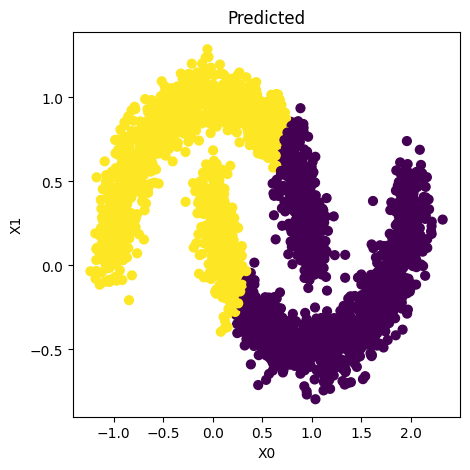

WSS: 1250.22350879105
BSS: 1805.871257582496
Total SSE: 3056.094766373546

Accuracy: 0.7496666666666667

Confusion matrix
[[1113  387]
 [ 364 1136]]

Classification report
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1500
           1       0.75      0.76      0.75      1500

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000

Running time: 0.5333497524261475


<Figure size 640x480 with 0 Axes>

In [52]:
start_time = time.time()
kmeans = KMeans(n_clusters=2).fit(X)
end_time = time.time()
WSS, BSS, total_SSE = print_evaluation_results("DATASET3 PREDICTED CLUSTER MEASURES:", False, True, X, true_y, kmeans.labels_,
                         end_time - start_time, kmeans.cluster_centers_)

pred_y_2 = kmeans.labels_

WSS_list.append(WSS)
BSS_list.append(BSS)
total_SSE_list.append(total_SSE)

DATASET3 PREDICTED CLUSTER MEASURES:
PREDICTED:


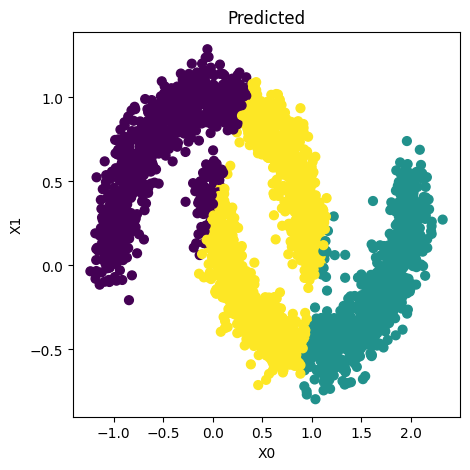

WSS: 834.0739536669319
BSS: 2217.859893870994
Total SSE: 3051.9338475379254

Accuracy: 0.5613333333333334

Confusion matrix
[[905  14 581]
 [ 90 779 631]
 [  0   0   0]]

Classification report
              precision    recall  f1-score   support

         0.0       0.91      0.60      0.73      1500
         1.0       0.98      0.52      0.68      1500
         2.0       0.00      0.00      0.00         0

    accuracy                           0.56      3000
   macro avg       0.63      0.37      0.47      3000
weighted avg       0.95      0.56      0.70      3000

Running time: 0.04627871513366699


<Figure size 640x480 with 0 Axes>

In [53]:
start_time = time.time()
kmeans = KMeans(n_clusters=3).fit(X)
end_time = time.time()
WSS, BSS, total_SSE = print_evaluation_results("DATASET3 PREDICTED CLUSTER MEASURES:", False, True, X, true_y, kmeans.labels_,
                         end_time - start_time, kmeans.cluster_centers_)

pred_y_3 = kmeans.labels_

WSS_list.append(WSS)
BSS_list.append(BSS)
total_SSE_list.append(total_SSE)

DATASET3 PREDICTED CLUSTER MEASURES:
PREDICTED:


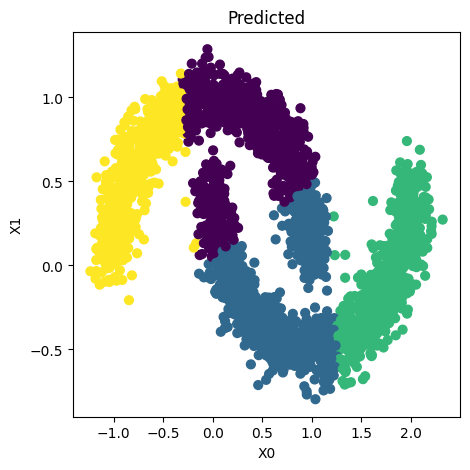

WSS: 551.0008951442758
BSS: 2505.0516595447243
Total SSE: 3056.0525546890003

Accuracy: 0.44966666666666666

Confusion matrix
[[680 213   4 603]
 [199 669 629   3]
 [  0   0   0   0]
 [  0   0   0   0]]

Classification report
              precision    recall  f1-score   support

         0.0       0.77      0.45      0.57      1500
         1.0       0.76      0.45      0.56      1500
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0

    accuracy                           0.45      3000
   macro avg       0.38      0.22      0.28      3000
weighted avg       0.77      0.45      0.57      3000

Running time: 1.194262981414795


<Figure size 640x480 with 0 Axes>

In [54]:
start_time = time.time()
kmeans = KMeans(n_clusters=4).fit(X)
end_time = time.time()
WSS, BSS, total_SSE = print_evaluation_results("DATASET3 PREDICTED CLUSTER MEASURES:", False, True, X, true_y, kmeans.labels_,
                         end_time - start_time, kmeans.cluster_centers_)

pred_y_4 = kmeans.labels_

WSS_list.append(WSS)
BSS_list.append(BSS)
total_SSE_list.append(total_SSE)

***
## Section: 5.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

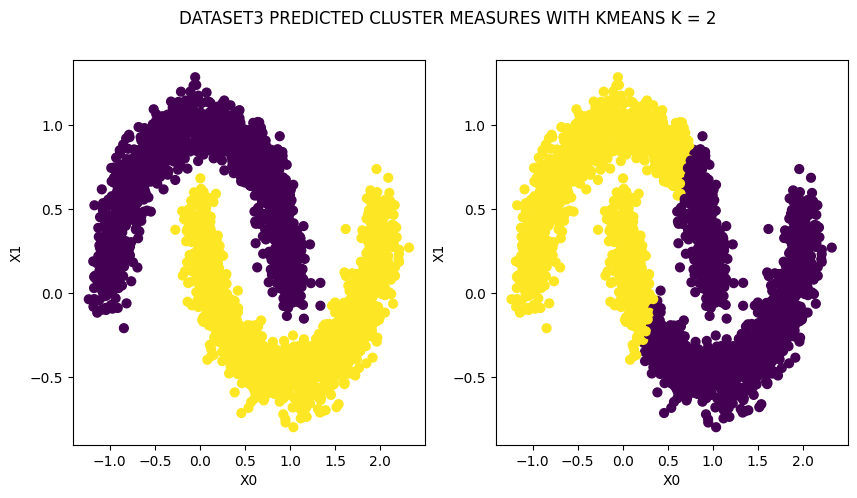

<Figure size 640x480 with 0 Axes>

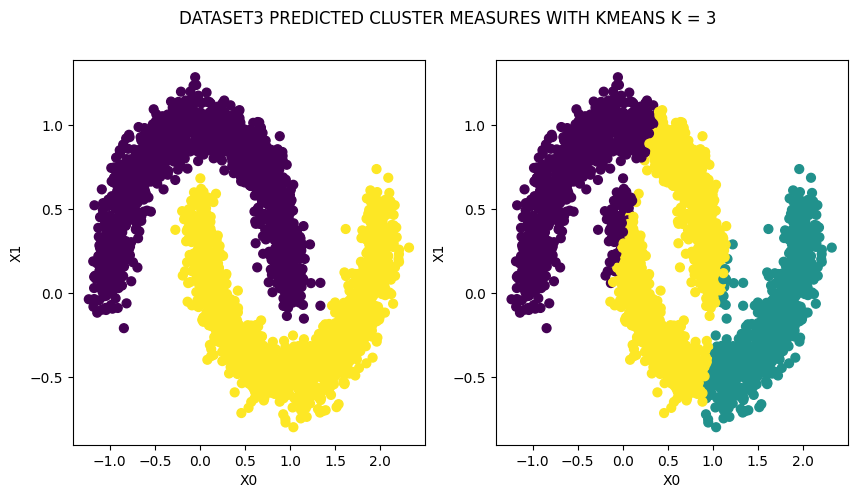

<Figure size 640x480 with 0 Axes>

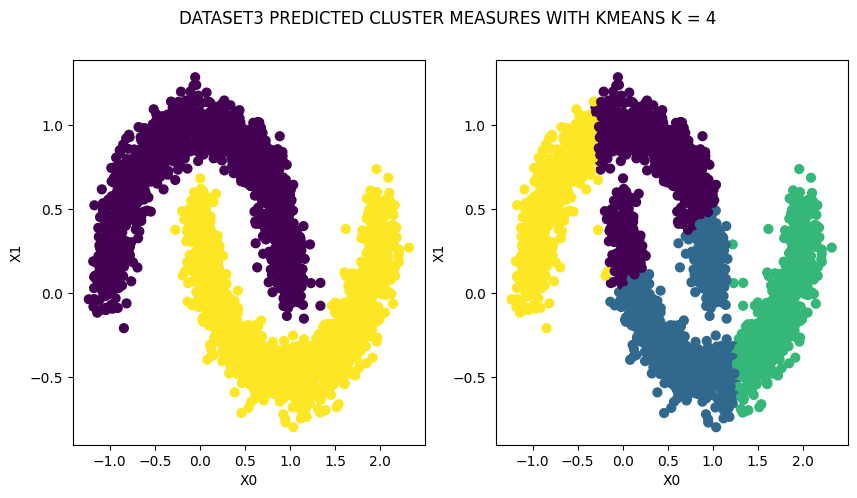

<Figure size 640x480 with 0 Axes>

In [55]:
plot_all_clusters("DATASET3 PREDICTED CLUSTER MEASURES WITH KMEANS K = 2", X, true_y, pred_y_2, 5)
plot_all_clusters("DATASET3 PREDICTED CLUSTER MEASURES WITH KMEANS K = 3", X, true_y, pred_y_3, 5)
plot_all_clusters("DATASET3 PREDICTED CLUSTER MEASURES WITH KMEANS K = 4", X, true_y, pred_y_4, 5)

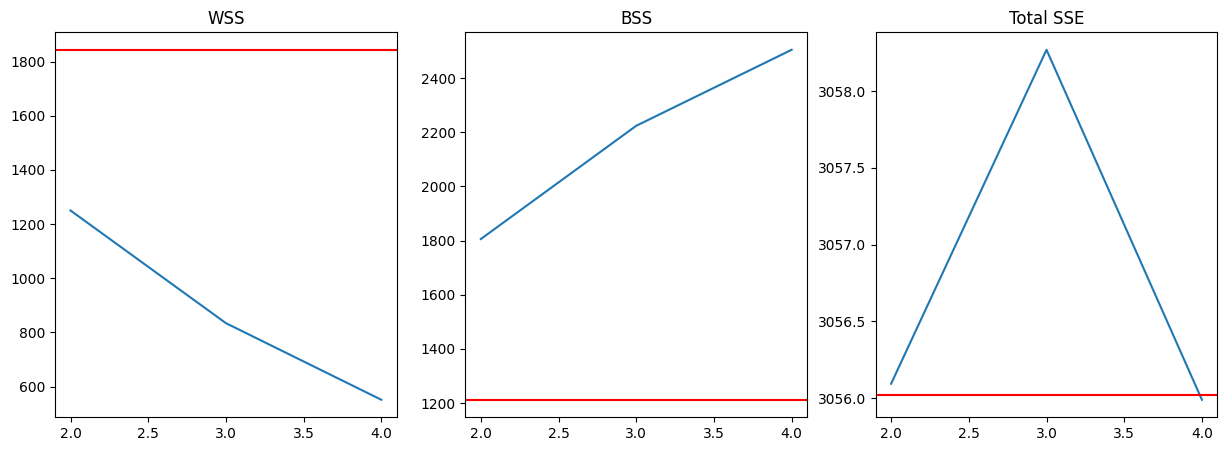

In [ ]:
x_axis = [2,3,4]
print_comparsion_plot(WSS_list, BSS_list, total_SSE_list, x_axis)

**Discussion**

Based on the true clustering, dataset3 is non-globular shapes. Therefore, K means clustering does not work well for this dataset. As I mentioned in the previous section (Section 2.3), the K means algorithm is based on the centroid, and it makes clusters in globular shapes. Based on the above scatter plots, K means the algorithm clusters data points vertically (spatial-based).

Compared to results from three different numbers of K values, K = 2 shows the best result. Accuracy is about 0.75 which is the highest among three different K values' results. Based on the classification report, precision is the highest when K = 3, but considering both precision and recall, K = 2 shows the best performance. Additionally, WSS and BSS values are closest to true clustering when K = 2 because WSS is decreasing and BSS is increasing.

***
# Section: 6 - Evaluate a **Second** Clustering Algorithm on **Dataset3**
***

***
## Section: 6.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
- See the SciKitLearn references.
***

**Discussion**

From K means, clustering results are poor compared to true clustering. This is because K means does not work well with non-globular shapes as I mentioned before. Therefore, I chose Spectral Clustering. This is very useful when each cluster is highly non-convex (non-globular). This is the connectivity-based algorithm, so data points that are close together are in the same cluster (this is similar to DBSCAN). Using eigenvalues, it can reduce dimensionality, and then capture non-convex clusters. Additionally, there is no assumption of the shape of the clusters.

***
## Section: 6.2 - Configure and Run the Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for (at least) two variations of the configuration settings (if any).
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
  - Create a scatterplot of your clustering.
    - To assist in comparison, consider creating two adjacent scatterplots (true vs predicted), or overlaying the true and predicted clusterings on one scatterplot.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the helper function above and the linear-sum-assignment and Hungarian algorithm references.
***

**Discussion**

The parameter n_cluster is the dimension of the projection subspace (the number of the cluster). In the true clustering, dataset3 has two clusters so I fixed it as 2. The parameter assign_labels is the strategy for assigning labels in the embedding space. There are three options - kmeans, discretize, and cluster_qr (default is kmeans). Discretize is less sensitive to random initialization compared to kmeans option. The cluster_qr directly extracts clusters from eigenvectors. There are no tuning parameters and no iterations, so it is faster than kmeans and discretize. In this evaluation, I run all three and I think discretize shows the best performance, so I chose it. The parameter gamma is the kernel coefficient. Using the kernel, an affinity matrix is constructed, and the parameter gamma decides the shape and scale of the kernel. By increasing its parameter value, I observed and compared results.

In [ ]:
WSS_list = WSS_list[:1]
BSS_list =BSS_list[:1]
total_SSE_list = total_SSE_list[:1]

DATASET2 PREDICTED CLUSTER MEASURES:
PREDICTED:


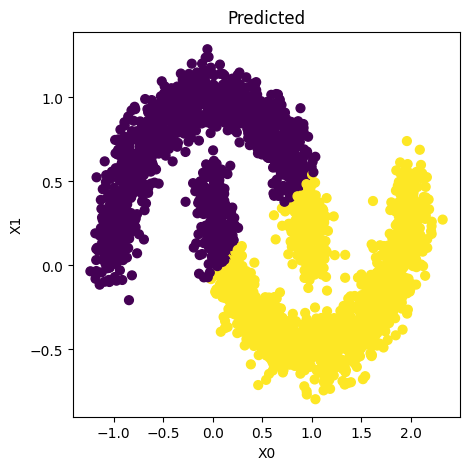

WSS: 1340.7722406829826
BSS: 1715.2501791853674
Total SSE: 3056.02241986835

Accuracy: 0.8483333333333334

Confusion matrix
[[1276  224]
 [ 231 1269]]

Classification report
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1500
           1       0.85      0.85      0.85      1500

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000

Running time: 1.4509193897247314


<Figure size 640x480 with 0 Axes>

In [ ]:
start_time = time.time()
spectral = SpectralClustering(n_clusters=2, assign_labels='discretize', gamma=5.0).fit(X)
end_time = time.time()

pred_y_1 = spectral.labels_

centroids = calculate_centroids(pred_y_1, X)

WSS, BSS, total_SSE = print_evaluation_results("DATASET2 PREDICTED CLUSTER MEASURES:", False, True, X, true_y, pred_y_1,
                         end_time - start_time, centroids)

WSS_list.append(WSS)
BSS_list.append(BSS)
total_SSE_list.append(total_SSE)

DATASET2 PREDICTED CLUSTER MEASURES:
PREDICTED:


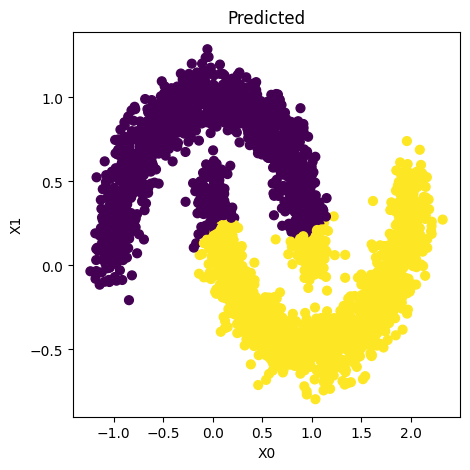

WSS: 1549.4519252681766
BSS: 1506.5704946001733
Total SSE: 3056.02241986835

Accuracy: 0.9266666666666666

Confusion matrix
[[1410   90]
 [ 130 1370]]

Classification report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1500
           1       0.94      0.91      0.93      1500

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000

Running time: 1.6766388416290283


<Figure size 640x480 with 0 Axes>

In [ ]:
start_time = time.time()
spectral = SpectralClustering(n_clusters=2, assign_labels='discretize', gamma=10.0).fit(X)
end_time = time.time()

pred_y_10 = spectral.labels_

centroids = calculate_centroids(pred_y_10, X)

WSS, BSS, total_SSE = print_evaluation_results("DATASET2 PREDICTED CLUSTER MEASURES:", False, True, X, true_y, pred_y_10,
                         end_time - start_time, centroids)

WSS_list.append(WSS)
BSS_list.append(BSS)
total_SSE_list.append(total_SSE)

DATASET2 PREDICTED CLUSTER MEASURES:
PREDICTED:


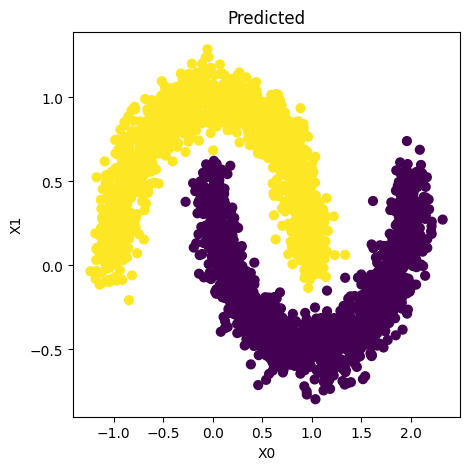

WSS: 1838.0525226343207
BSS: 1217.9698972340284
Total SSE: 3056.022419868349

Accuracy: 0.999

Confusion matrix
[[1498    2]
 [   1 1499]]

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1500
           1       1.00      1.00      1.00      1500

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

Running time: 2.5135691165924072


<Figure size 640x480 with 0 Axes>

In [ ]:
start_time = time.time()
spectral = SpectralClustering(n_clusters=2, assign_labels='discretize', gamma=50.0).fit(X)
end_time = time.time()

pred_y_50 = spectral.labels_

centroids = calculate_centroids(pred_y_50, X)

WSS, BSS, total_SSE = print_evaluation_results("DATASET2 PREDICTED CLUSTER MEASURES:", False, True, X, true_y, pred_y_50,
                         end_time - start_time, centroids)

WSS_list.append(WSS)
BSS_list.append(BSS)
total_SSE_list.append(total_SSE)

***
## Section: 6.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

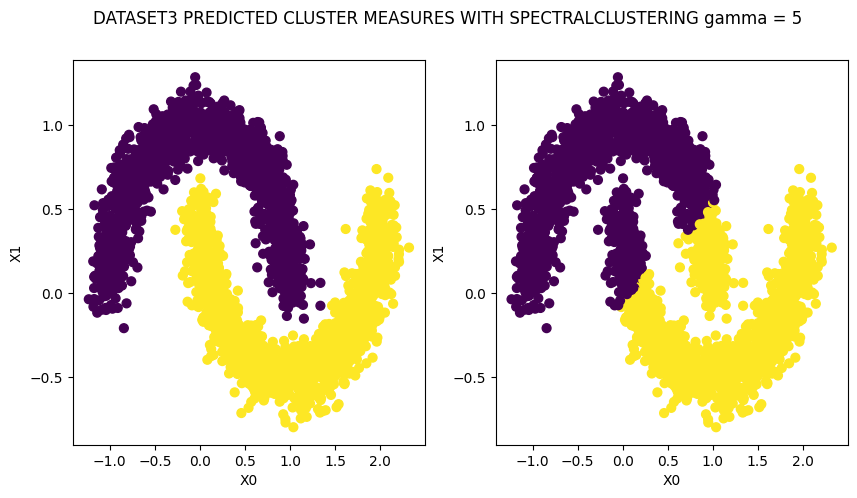

<Figure size 640x480 with 0 Axes>

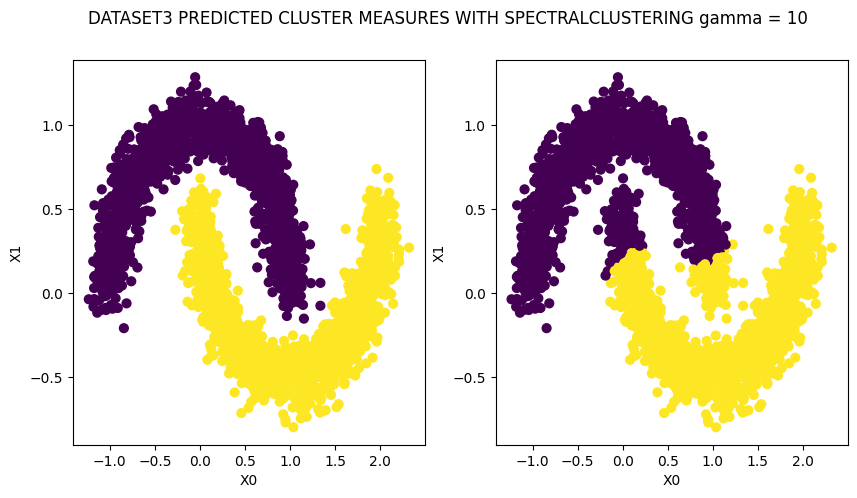

<Figure size 640x480 with 0 Axes>

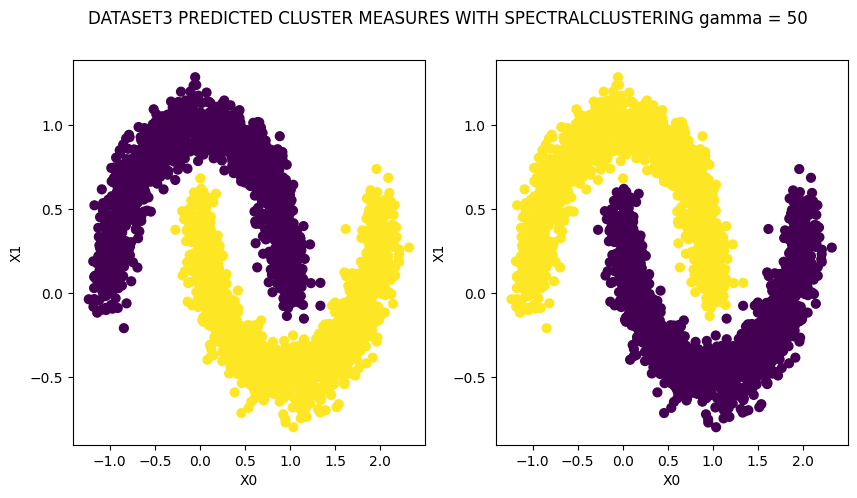

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_all_clusters("DATASET3 PREDICTED CLUSTER MEASURES WITH SPECTRALCLUSTERING gamma = 5", X, true_y, pred_y_1, 5)
plot_all_clusters("DATASET3 PREDICTED CLUSTER MEASURES WITH SPECTRALCLUSTERING gamma = 10", X, true_y, pred_y_10, 5)
plot_all_clusters("DATASET3 PREDICTED CLUSTER MEASURES WITH SPECTRALCLUSTERING gamma = 50", X, true_y, pred_y_50, 5)

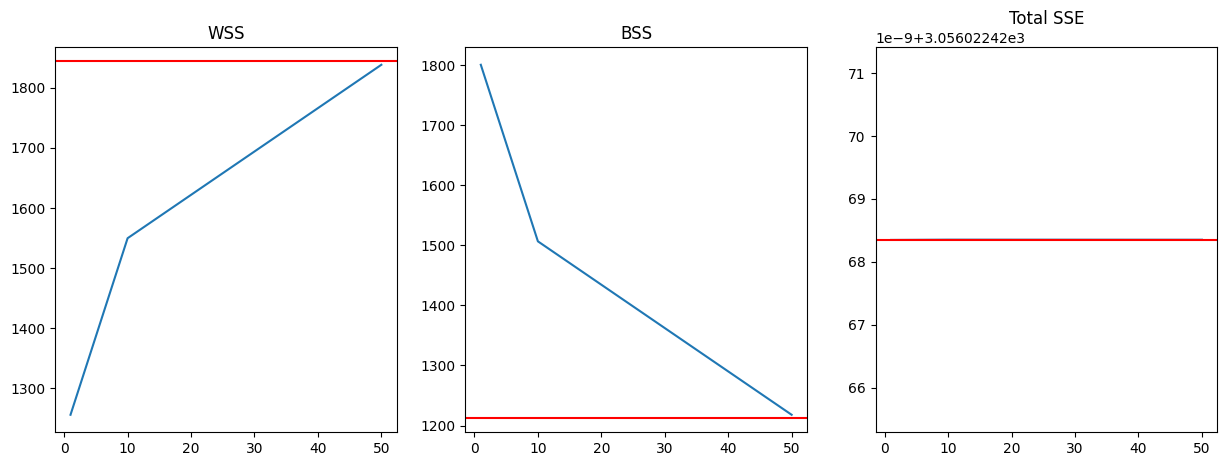

In [ ]:
x_axis = [1, 10, 50]
print_comparsion_plot(WSS_list, BSS_list, total_SSE_list, x_axis)

**Discussion**

Compared to the true clustering, when gamma = 50 shows the best performance. As you can check from the above graph, the red line means the true clustering values. When gamma = 50, WSS and BSS are the closest to the true clustering. Accuracy is 0.999 (about only 3 data points are misclassified) and shows good performance based on the classification report.

By increasing the gamma value, the results are becoming better in terms of accuracy, precision, and recall. Larger gamma values cause a narrower kernel. This created a more localized affinity kernel. Therefore, only nearby data points can have high similarity. By increasing gamma values, close data points can be easily in the same cluster, but distant data points cannot be in the same cluster.

WSS is increasing and BSS is decreasing. This is because Spectral Clustering does not use centroids for the clustering. In this evaluation, the centroid is the mean of each clustering (same as K means). Therefore, WSS is increasing because the data points in the same cluster are not grouped in a globular shape. Also, BSS is decreasing because the distance between centroids and the global centroid is closer by increasing gamma values and this can be checked from the above scatter plot visually.

In terms of running time, this algorithm takes some time (more than 1 second).

***
# Section: 7 - Comparison of the Two Clustering Algorithms on **Dataset3**
***

***
## Section: 7.1 - Compare Their Performance
- What was their relative performance (quality and timing), and their performance versus the true clustering?
- What characteristics of the data might impact the clustering algorithms' performance?
***

**Discussion**

Result of two clustering algorithms on dataset3

|  | WSS | BSS | Total SSE | Accuaracy |
|--|-----|-----|-----------|-----------|
| True | 1843.8528440575797 | 1212.169575810768 | 3056.0224198683477 | - |
| K means | 1250.22350879105 | 1805.871257582496 | 3056.094766373546 | 0.75 |
| Spectral Clustering | 1838.0525226343207 | 1217.9698972340284 | 3056.022419868349 | 0.999 |

**Discussion**

The best performance in the K means when K = 2 and the best performance in the Spectral Clustering is when gamma = 50. Compared to two clustering algorithms - K means and Spectral Clustering, the result from Spectral Clustering is better than K means in terms of accuracy, precision, and recall. Compared to true clustering, Spectral Clustering shows closer WSS and BSS. These results are visualized in Section 5.3 (K means) and Section 6.3 (Spectral Clustering).

As I mentioned in Section 4.1, K means does not work well with non-globular shapes. The dataset3 is non-globular shape as you can see from the true clustering. Similar to Section 2.3, Section 5.3 shows the similar size of each cluster. K means using the mean of the points in the cluster as centroid, so it only works well for the globular shapes.

Whereas Spectral Clustering works well with non-globular shapes. First, it does not use centroids to cluster. This is a connectivity-based algorithm, so closer points can be in the same cluster. This is similar to DBSCAN in these terms. Second, it uses eigenvalue, so it can reduce dimensionality then possible to deal with non-globular shapes.

***
## Section: 7.2 - Choose the Better Clustering Algorithm
- Choose one of the two clustering algorithm as better and explain why.
***

**Discussion**

Spectral Clustering takes more time than K means. Spectral Clustering takes at least 1 second, but K means it takes at most 1 second. Even if it's an advantage, I chose Spectral Clustering because it shows outperform in terms of accuracy, precision, and recall. WSS and BSS from Spectral Clustering show closer to the true clustering.

***
# Section: 8 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
***

**Discussion**

Through this homework, I ran three different clustering algorithms - K means, DBSCAN, and Spectral Clustering. Also, I evaluated them with SSE, Accuracy, and classification report.

I can learn how to calculate WSS, BSS, and total SSE at the end and understand why they are needed for the evaluation of K means. Also, I can understand how each clustering algorithm works and each advantages and limitations. Especially, it was interesting to view the limitation of the K means algorithm through the experiment and evaluation with real datasets, and DBSCAN and Spectral Clustering can cover those types of datasets. Changing eps values in DBSCAN and finding appropriate eps values was interesting to me because I can see changes visually. Similarly, changing gamma values in Spectral Clustering was interesting.

***
# Section: 9 - References
***

* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

***
### END-OF-SUBMISSION
***